## Lesson 01: Obtaining Data

In [1]:
import pathlib
 
import tensorflow as tf
 
# download dataset provided by Anki: https://www.manythings.org/anki/
text_file = tf.keras.utils.get_file(
    fname="fra-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True,
)
# show where the file is located now
text_file = pathlib.Path(text_file).parent / "fra.txt"
print(text_file)

3423204/3423204 [==============================] - 1s 0us/step
C:\Users\sarathbabu.karunanit\.keras\datasets\fra.txt


## Lesson 02: Text Normalization

In [2]:
import pathlib
import pickle
import random
import re
import unicodedata
 
import tensorflow as tf
 
# download dataset provided by Anki: https://www.manythings.org/anki/
text_file = tf.keras.utils.get_file(
    fname="fra-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True,
)
text_file = pathlib.Path(text_file).parent / "fra.txt"
 
def normalize(line):
    """Normalize a line of text and split into two at the tab character"""
    line = unicodedata.normalize("NFKC", line.strip().lower())
    line = re.sub(r"^([^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(\s[^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(?!\s)([^ \w])$", r" \1", line)
    line = re.sub(r"(?!\s)([^ \w]\s)", r" \1", line)
    eng, fra = line.split("\t")
    fra = "[start] " + fra + " [end]"
    return eng, fra
 
# normalize each line and separate into English and French
with open(text_file) as fp:
    text_pairs = [normalize(line) for line in fp]
    
# print some samples
for _ in range(5):
    print(random.choice(text_pairs))

with open("text_pairs.pickle", "wb") as fp:
    pickle.dump(text_pairs, fp)

('why are you asking this ?', '[start] pourquoi demandez-vous ã§a  ?  [end]')
('tom is working on it right now .', '[start] tom travaille dessus en ce moment mãame . [end]')
('tom is very likely to succeed .', '[start] tom va trã  ̈ s probablement rã©ussir . [end]')
('i know tom is miserable .', '[start] je sais que tom est malheureux . [end]')
('how are you ? did you have a good trip ?', '[start] comment vas-tuâ €  ̄  ? as-tu fait un bon voyageâ €  ̄  ? [end]')


In [3]:
import pickle
 
with open("text_pairs.pickle", "rb") as fp:
    text_pairs = pickle.load(fp)
    
# count tokens
eng_tokens, fra_tokens = set(), set()
eng_maxlen, fra_maxlen = 0, 0
for eng, fra in text_pairs:
    eng_tok, fra_tok = eng.split(), fra.split()
    eng_maxlen = max(eng_maxlen, len(eng_tok))
    fra_maxlen = max(fra_maxlen, len(fra_tok))
    eng_tokens.update(eng_tok)
    fra_tokens.update(fra_tok)
print(f"Total English tokens: {len(eng_tokens)}")
print(f"Total French tokens: {len(fra_tokens)}")
print(f"Max English length: {eng_maxlen}")
print(f"Max French length: {fra_maxlen}")
print(f"{len(text_pairs)} total pairs")

Total English tokens: 14989
Total French tokens: 31635
Max English length: 51
Max French length: 63
167130 total pairs


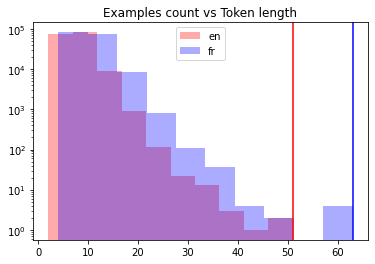

In [5]:
import pickle
 
import matplotlib.pyplot as plt
 
with open("text_pairs.pickle", "rb") as fp:
    text_pairs = pickle.load(fp)
    
# histogram of sentence length in tokens
en_lengths = [len(eng.split()) for eng, fra in text_pairs]
fr_lengths = [len(fra.split()) for eng, fra in text_pairs]
 
plt.hist(en_lengths, label="en", color="red", alpha=0.33)
plt.hist(fr_lengths, label="fr", color="blue", alpha=0.33)
plt.yscale("log")     # sentence length fits Benford"s law
plt.ylim(plt.ylim())  # make y-axis consistent for both plots
plt.plot([max(en_lengths), max(en_lengths)], plt.ylim(), color="red")
plt.plot([max(fr_lengths), max(fr_lengths)], plt.ylim(), color="blue")
plt.legend()
plt.title("Examples count vs Token length")
plt.show()